### Notebook for running SCOT on SNARE-seq Cell Mixture Data
**Note:** This version of the notebook runs a new setting for SCOT, where we use correlation as a metric for building kNN graphs and use connectivity information from this graph in intra-domain similarity matrices fed into the optimal transport algorithm.  

**Access to the raw dataset:** Gene Expression Omnibus accession no. GSE126074. 
SNARE-seq data in `/data` folder containes the version with dimensionality reduction techniques applied from the original SNARE-seq paper (https://www.nature.com/articles/s41587-019-0290-0)    

SCOT software has been updated on 20 September 2020. It now outputs error statements for convergence issues at low epsilon values. When it runs into numerical instabilities in convergence, it outputs None, None instead of X_new, y_new. If you run into such an error, please try using a larger epsilon value for the entropic regularization.  

If you have any questions, e-mail: ritambhara@brown.edu, pinar_demetci@brown.edu, rebecca_santorella@brown.edu  

In [1]:
import src.utils as ut
import src.evals as evals
from src.scot import *

In [70]:
X=np.load("data/scatac_feat.npy") 
y=np.load("data/scrna_feat.npy")
print("Dimensions of input datasets are: ", "X= ", X.shape, " y= ", y.shape)

Dimensions of input datasets are:  X=  (1047, 19)  y=  (1047, 10)


In [82]:
# X=ut.unit_normalize(X)
# y=ut.unit_normalize(y)

# We have used l2 unit normalization with all methods as per MMD-MA: https://www.biorxiv.org/content/10.1101/644310v2.full.pdf
## If you'd like to apply z-score normalization instead:
X=ut.zscore_standardize(X)
y=ut.zscore_standardize(y)

In [77]:
# Set hyperparameters of the algorithm:
k=50
e=0.0005
X_new,y_new= scot(X, y, k, e, rho = 0.05, mode="connectivity", metric="correlation", balanced = False)

##### Evaluate results:

In [78]:
fracs=evals.calc_domainAveraged_FOSCTTM(X_new, y_new)
print("Average FOSCTTM score for this alignment is: ", np.mean(fracs))

Average FOSCTTM score for this alignment is:  0.2537729577907195


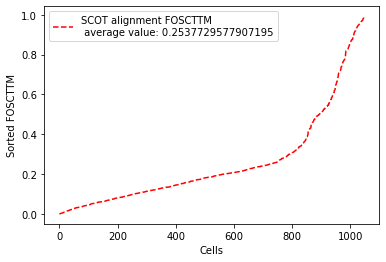

In [79]:
import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs))
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

##### Visualize Projections

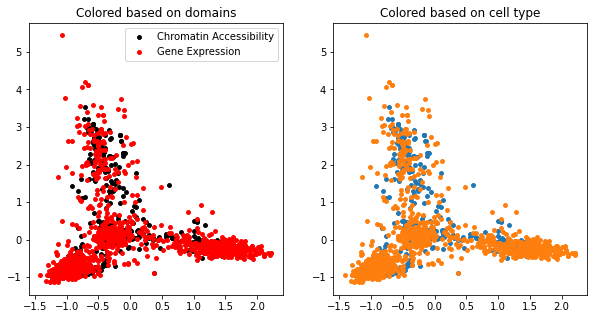

In [80]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
Xy_pca=pca.fit_transform(np.concatenate((X_new, y_new), axis=0))
X_pca=Xy_pca[0: 1047,]
y_pca=Xy_pca[1047:,]

### Read in cell type information:
# Xlabels=np.genfromtxt("data/SNAREseq_typesChromatin.txt")
# ylabels=np.genfromtxt("data/SNAREseq_typesExpression.txt")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.scatter(X_pca[:,0], X_pca[:,1], c="k", s=15, label="Chromatin Accessibility")
ax1.scatter(y_pca[:,0], y_pca[:,1], c="r", s=15, label="Gene Expression")
ax1.legend()
ax1.set_title("Colored based on domains")

ax2.scatter(X_pca[:,0], X_pca[:,1], cmap="rainbow", s=15)
ax2.scatter(y_pca[:,0], y_pca[:,1], cmap="rainbow", s=15)
ax2.set_title("Colored based on cell type")
plt.show()


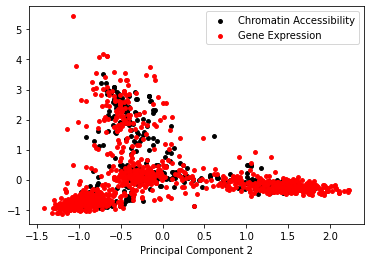

In [81]:
plt.scatter(X_pca[:,0], X_pca[:,1], c="k", s=15, label="Chromatin Accessibility")
plt.scatter(y_pca[:,0], y_pca[:,1], c="r", s=15, label="Gene Expression")
plt.xlabel("Principal Component 1")
plt.xlabel("Principal Component 2")
plt.legend()
plt.savefig("SNARE_align.svg")
plt.show()

In [54]:

plt.scatter(X_pca[:,0], X_pca[:,1], cmap="rainbow", c=Xlabels, s=15)
plt.scatter(y_pca[:,0], y_pca[:,1], cmap="rainbow", c=ylabels, s=15)


plt.xlabel("Principal Component 1")
plt.xlabel("Principal Component 2")
plt.savefig("SNARE_align_class.svg")
plt.show()

NameError: name 'Xlabels' is not defined

In [13]:
X=np.load("data/scatac_feat.npy") 
y=np.load("data/scrna_feat.npy")
print("Dimensions of input datasets are: ", "X= ", X.shape, " y= ", y.shape)

Dimensions of input datasets are:  X=  (1047, 19)  y=  (1047, 10)


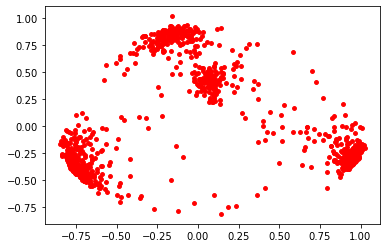

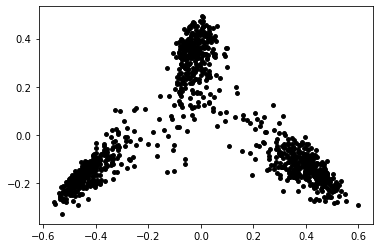

In [14]:
np.save("SNARE_Chrom_SCOT.npy", X_pca)
np.save("SNARE_Expression_SCOT.npy", y_pca)
X=ut.unit_normalize(X)
y=ut.unit_normalize(y)
X_pca=pca.fit_transform(X)
y_pca=pca.fit_transform(y)

plt.scatter(y_pca[:,0], y_pca[:,1], c="r", s=15)
plt.savefig("SNARE_exp.svg")
plt.show()


plt.scatter(X_pca[:,0], X_pca[:,1], c="k", s=15)
plt.savefig("SNARE_chrom.svg")
plt.show()